In [1165]:
using Optim, Gadfly, DataFrames;

In [1166]:
set_default_plot_size(16cm, 10cm)

In [1167]:
alg = BFGS()

Optim.BFGS(Optim.hz_linesearch!)

In [1168]:
λ = .2

0.2

In [1169]:
function g(x)
    a = randexp()
    if (a > 3)
        a + x + rand() * 30
    else
        a + x
    end
end

g (generic function with 1 method)

In [1170]:
pred = [x for x = 1:100]
obs = [g(x) for x = 1:100]
N = length(pred)
M = \lambda * N

LoadError: LoadError: syntax: "\" is not a unary operator
while loading In[1170], in expression starting on line 4

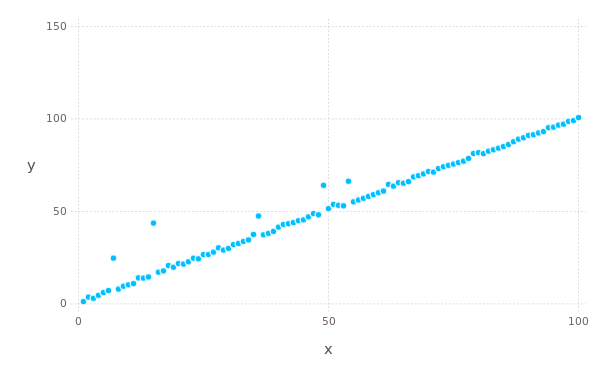

In [1171]:
plot(x = pred, y = obs)

In [1172]:
function sqerror(β)
    err = 0.0
    for i in 1:length(pred)
        pred_i = β[1] + β[2] * pred[i]
        err += (obs[i] - pred_i)^2
    end
    return err / N
end

sqerror (generic function with 1 method)

In [1173]:
sqres = optimize(sqerror, [0.0, 0.0], 
method = alg, 
show_trace = true,
store_trace = true)

Iter     Function value   Gradient norm 
     0     3.527440e+03     6.893230e+03
     1     1.650972e+01     1.459909e+00
     2     1.434512e+01     3.813527e-09


Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [0.0,0.0]
 * Minimizer: [2.980143711411469,0.9741740600028995]
 * Minimum: 1.434512e+01
 * Iterations: 2
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: false
   * |g(x)| < 1.0e-08: true
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 13
 * Gradient Calls: 13

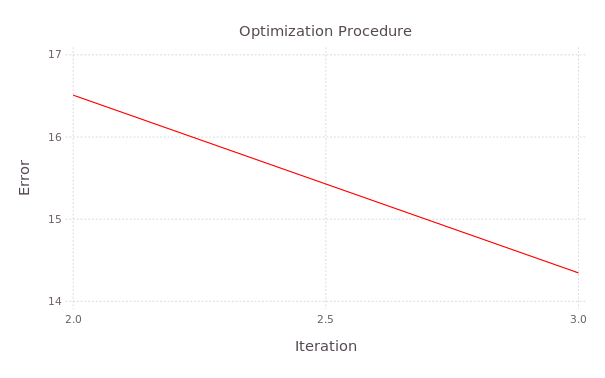

In [1174]:
tr = Optim.f_trace(sqres)
plot(x = [x for x = 2:length(tr)], y = tr[2:end], Geom.line,
Theme(default_color = colorant"red"), 
Guide.title("Optimization Procedure"),
Guide.xlabel("Iteration"),
Guide.ylabel("Error"))

In [1175]:
function sqfit(x)
    β = Optim.minimizer(sqres)
    β[1] + β[2] * x
end

sqfit (generic function with 1 method)

In [1176]:
function maxerror(β)
    err = Float64[]
    for i in 1:length(pred)
        pred_i = β[1] + β[2] * pred[i]
        push!(err, (obs[i] - pred_i)^2)
    end
    return maximum(err)
end

maxerror (generic function with 1 method)

In [1177]:
maxres = optimize(maxerror, [0.0, 0.0], 
method = alg, 
show_trace = true, 
store_trace = true)

Iter     Function value   Gradient norm 
     0     1.014889e+04     2.014834e+04
     1     8.168937e+02     8.574406e+02
     2     3.271908e+02     1.085305e+02
     3     2.670971e+02     4.902931e+02
     4     2.445581e+02     9.383013e+01
     5     2.246809e+02     4.496807e+02
     6     2.184436e+02     8.867902e+01
     7     2.152771e+02     4.401697e+02
     8     2.119119e+02     8.734316e+01
     9     2.063604e+02     3.160355e+02
    10     2.063224e+02     8.618356e+01
    11     2.060902e+02     4.306752e+02
    12     2.060842e+02     3.158239e+02
    13     2.060789e+02     4.306635e+02
    14     2.059801e+02     3.157441e+02
    15     2.058355e+02     3.936049e+02
    16     2.058314e+02     1.258022e+03
    17     2.058299e+02     1.904605e+02
    18     2.058284e+02     4.633447e+02
    19     2.058248e+02     4.429401e+02
    20     2.058240e+02     1.154121e+02
    21     2.058241e+02     2.507123e+01


Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [0.0,0.0]
 * Minimizer: [14.35178674509568,1.0001884282742561]
 * Minimum: 2.058241e+02
 * Iterations: 21
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: true
   * |g(x)| < 1.0e-08: false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 127
 * Gradient Calls: 127

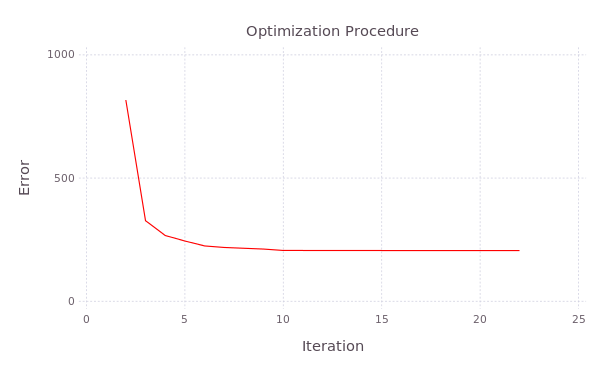

In [1178]:
tr = Optim.f_trace(maxres)
plot(x = [x for x = 2:length(tr)], y = tr[2:end], Geom.line,
Theme(default_color = colorant"red"), 
Guide.title("Optimization Procedure"),
Guide.xlabel("Iteration"),
Guide.ylabel("Error"))

In [1179]:
function maxfit(x)
    β = Optim.minimizer(maxres)
    β[1] + β[2] * x
end

maxfit (generic function with 1 method)

In [1180]:
function blenderr(β)
    err = Float64[]
    mse = 0.0
    for i in 1:length(pred)
        pred_i = β[1] + β[2] * pred[i]  
        ϵ = (obs[i] - pred_i)^2
        mse += ϵ
        push!(err, ϵ) 
    end
    sort!(err, rev = true)
    anomerr = 0.0
    for i in 1:M
        anomerr += err[i] 
    end
    mse / N + anomerr / M
end

blenderr (generic function with 1 method)

In [1181]:
blendres = optimize(blenderr, [0.0, 0.0], 
method = alg, 
show_trace = true, 
store_trace = true)

Iter     Function value   Gradient norm 
     0     1.367633e+04     2.704157e+04
     1     8.311573e+02     9.126599e+02
     2     3.394904e+02     2.031108e+01
     3     3.118066e+02     5.972477e+02
     4     3.049712e+02     9.999116e+01
     5     3.040267e+02     5.431648e+02
     6     3.000659e+02     1.812384e+02
     7     2.999368e+02     1.713347e+02
     8     2.999240e+02     3.251359e+02
     9     2.998907e+02     1.659038e+02
    10     2.998880e+02     3.326266e+02
    11     2.998838e+02     1.604607e+02
    12     2.998822e+02     3.341649e+02
    13     2.998824e+02     3.341509e+02


Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [0.0,0.0]
 * Minimizer: [15.888634696270286,0.8263327678484114]
 * Minimum: 2.998824e+02
 * Iterations: 13
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: true
   * |g(x)| < 1.0e-08: false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 65
 * Gradient Calls: 65

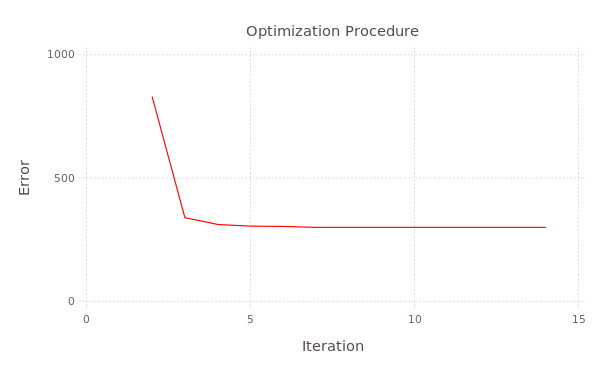

In [1182]:
tr = Optim.f_trace(blendres)
plot(x = [x for x = 2:length(tr)], y = tr[2:end], Geom.line,
Theme(default_color = colorant"red"), 
Guide.title("Optimization Procedure"),
Guide.xlabel("Iteration"),
Guide.ylabel("Error"))

In [1183]:
function blendfit(x)
    β = Optim.minimizer(blendres)
    β[1] + β[2] * x
end

blendfit (generic function with 1 method)

In [1184]:
data = DataFrame(
predictor = pred, 
observed = obs, 
sqfit = sqfit(pred), 
maxfit = maxfit(pred),
blendfit = blendfit(pred));

In [1185]:
df = stack(data, [:observed, :sqfit, :maxfit, :blendfit]);

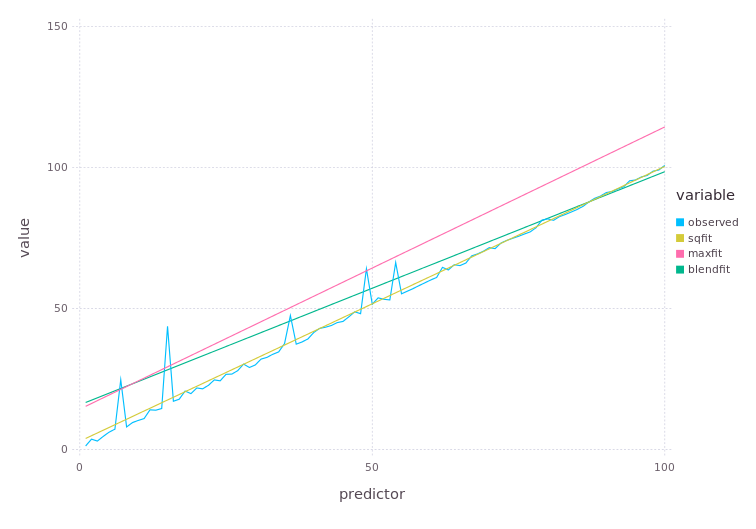

In [1186]:
set_default_plot_size(20cm, 14cm)
plot(df, x = "predictor", y = "value", color = "variable", Geom.line)